Using MNIST Database fo train image processing systems and build a NN

In [1]:
#install libraries
!pip install tensorflow_cpu==2.18.0
!pip install matplotlib==3.9.2

   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 7.8/7.8 MB 48.5 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.1
    Uninstalling matplotlib-3.10.1:
      Successfully uninstalled matplotlib-3.10.1


In [2]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [6]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.utils import to_categorical

In [4]:
# Test dataset from keras library
from keras.datasets import mnist

#read dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape

(60000, 28, 28)

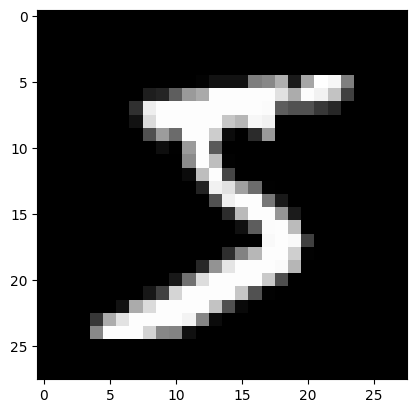

In [7]:
#lets visualize the data
plt.imshow(X_train[0], cmap='gray')

In [8]:
#Flatten the image in 1D vectors as conventional neural networks cannot process 2D data
num_pixels = X_train.shape[1] * X_train.shape[2] #find the size of the vector
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32') #reshape the training data
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32') #reshape the test data
#normalize the data as the pixel values are between 0-255
X_train = X_train / 255 #normalize the training data
X_test = X_test / 255 #normalize the test data


In [9]:
#for classification, we need to convert the labels to one-hot encoding
y_train = to_categorical(y_train) #one-hot encoding for training data
y_test = to_categorical(y_test) #one-hot encoding for test data
#check the shape of the data    
num_classes = y_train.shape[1] #number of classes
print("Number of classes: ", num_classes)

Number of classes:  10


In [9]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
#Build the neural network model class
def classification_model():
    model = Sequential()
    model.add(Input(shape=(num_pixels,))) #input layer
    model.add(Dense(num_pixels, activation='relu')) #hidden layer 1
    model.add(Dense(100, activation='relu')) #hidden layer 2
    model.add(Dense(num_classes, activation='softmax')) #output layer
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #compile the model   
    return model

In [11]:
#Train and Test the model
model = classification_model() #create the model
model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=10, verbose=2) #train the model
scores = model.evaluate(X_test, y_test, verbose=0) #test the model
#Print accuracy and error
print('Accuracy: {}% \ Error: {}'.format(scores[1],1-scores[1])) #accuracy   

Epoch 1/10


<>:6: SyntaxWarning: invalid escape sequence '\ '
<>:6: SyntaxWarning: invalid escape sequence '\ '
C:\Users\Dhaval\AppData\Local\Temp\ipykernel_532\1768267781.py:6: SyntaxWarning: invalid escape sequence '\ '
  print('Accuracy: {}% \ Error: {}'.format(scores[1],1-scores[1])) #accuracy


1875/1875 - 8s - 5ms/step - accuracy: 0.9449 - loss: 0.1841 - val_accuracy: 0.9715 - val_loss: 0.0901
Epoch 2/10
1875/1875 - 8s - 4ms/step - accuracy: 0.9754 - loss: 0.0793 - val_accuracy: 0.9759 - val_loss: 0.0784
Epoch 3/10
1875/1875 - 8s - 4ms/step - accuracy: 0.9832 - loss: 0.0529 - val_accuracy: 0.9811 - val_loss: 0.0630
Epoch 4/10
1875/1875 - 8s - 4ms/step - accuracy: 0.9869 - loss: 0.0394 - val_accuracy: 0.9787 - val_loss: 0.0743
Epoch 5/10
1875/1875 - 9s - 5ms/step - accuracy: 0.9894 - loss: 0.0321 - val_accuracy: 0.9795 - val_loss: 0.0697
Epoch 6/10
1875/1875 - 9s - 5ms/step - accuracy: 0.9920 - loss: 0.0248 - val_accuracy: 0.9799 - val_loss: 0.0795
Epoch 7/10
1875/1875 - 9s - 5ms/step - accuracy: 0.9923 - loss: 0.0232 - val_accuracy: 0.9799 - val_loss: 0.0815
Epoch 8/10
1875/1875 - 9s - 5ms/step - accuracy: 0.9934 - loss: 0.0207 - val_accuracy: 0.9788 - val_loss: 0.0917
Epoch 9/10
1875/1875 - 9s - 5ms/step - accuracy: 0.9943 - loss: 0.0180 - val_accuracy: 0.9798 - val_loss: 0